In [1]:
import Pkg; Pkg.add(["Plots"]);
import Logging; Logging.disable_logging(Logging.Info)

    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
  No Changes to `~/srv/rep/22-course-cse6643/mybinder/Project.toml`
  No Changes to `~/srv/rep/22-course-cse6643/mybinder/Manifest.toml`


LogLevel(1)

In [2]:
const STATIC_LECTURE = false;

In [3]:
using LinearAlgebra;
using Plots; gr(); default(l=5, size=(900,550), label=false);
using Printf;

BLAS.set_num_threads(1)

if STATIC_LECTURE
    default(fmt=:png)
end

prettyprint(a) = map(x -> @sprintf("%+.2f", x), a)
sciprint(a) = map(x -> @sprintf("%+.2e", x), a)

function imshow(x; kwargs...)
    return heatmap(x
        , aspect_ratio=:equal
        , framestyle=:none
        , yflip=true
        , c=cgrad(:diverging_gwv_55_95_c39_n256, rev=true)
        ; kwargs...
    )
end
bigspy(x; kwargs...) = spy(x, m=4, c=:diverging_gwv_55_95_c39_n256; kwargs...)
p = plot!([0,1],[0,1]);

WebIO._IJuliaInit()

Plots.AnimatedGif("/home/tisaac/srv/rep/22-course-cse6643/mybinder/sched-matmult.gif")
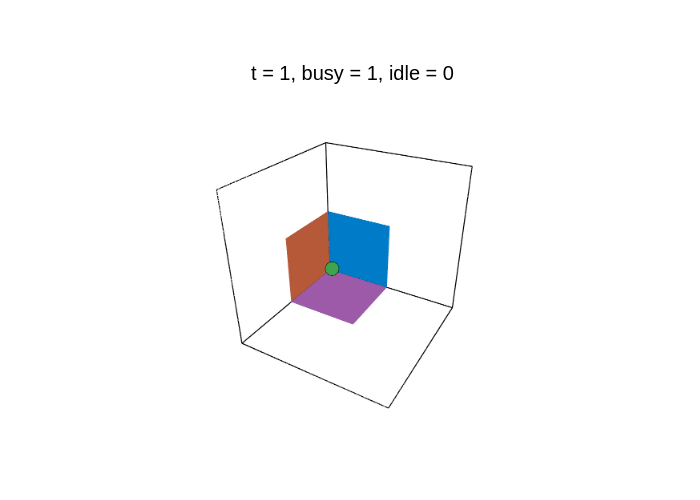

In [4]:
plotlyjs(); default(fmt=:png)
anim = Animation()
n = 8
b = 4
z = 64
plot_orig = plot([0, n, n, 0, 0], [0, 0, n, n, 0], [0, 0, 0, 0, 0], l=(:black, 2), lim=(0,n), yflip=:true, framestyle = :none)
plot!(plot_orig, [0, n, n, 0, 0], [0, 0, 0, 0, 0], [0, 0, n, n, 0], l=(:black, 2))
plot!(plot_orig, [0, 0, 0, 0, 0], [0, n, n, 0, 0], [0, 0, n, n, 0], l=(:black, 2))
p = deepcopy(plot_orig)
#plot!(p, title="t = 0, busy = 0, idle = 0")
#frame(anim, p)
ki = 1
kj = 1
kk = 0
kjinc = 1
kkinc = 1
d = 0
lt = 0
for t = 1:(div(n,b)^3 * z)
    if (t % z) == 1
        lt = t - 1
        p = deepcopy(plot_orig)
        if (kk + kkinc <= div(n, b) && kk + kkinc > 0)
            kk += kkinc
        elseif (kj + kjinc <= div(n, b) && kj + kjinc > 0)
            kkinc *= -1
            kj += kjinc
        else
            kkinc *= -1
            kjinc *= -1
            ki += 1
        end
        plot!(p, [(kj-1)*b, kj*b, kj*b, (kj-1)*b, (kj-1)*b], [(ki-1)*b, (ki-1)*b, (ki)*b, (ki)*b, (ki-1)*b], [0, 0, 0, 0, 0], st=:mesh3d, l=0, fillcolor=4)
        plot!(p, [(kj)*b, (kj-1)*b, (kj-1)*b, (kj)*b, (kj)*b], 1.e-6*[(ki-1)*b, (ki-1)*b, (ki)*b, (ki)*b, (ki-1)*b], [(kk-1)*b, (kk-1)*b, (kk)*b, (kk)*b, (kk-1)*b], st=:mesh3d, l=0, fillcolor=1)
        plot!(p, 1.e-6*[(kj-1)*b, (kj-1)*b, (kj)*b, (kj)*b, (kj-1)*b], [(ki-1)*b, (ki)*b, (ki)*b, (ki-1)*b, (ki-1)*b], [(kk-1)*b, (kk-1)*b, (kk)*b, (kk)*b, (kk-1)*b], st=:mesh3d, l=0, fillcolor=2)
        #plot!(p, [0, 0, 0, 0, 0], [(ki-1)*b, (ki-1)*b, (ki)*b, (ki)*b, (ki-1)*b], [(kk)*b, (kk)*b, (kk-1)*b, (kk-1)*b, (kk)*b], st=:mesh3d, l=0, fillcolor=2)
        #plot!(p, [-2, -1, -1, -2, -2], [(ki-1)*bi, (ki-1)*bi, ki*bi, ki*bi, (ki-1)*bi], st=:shape, l=0, fillcolor=1)
    end
    if t - lt <= b^3
        tk = (t-lt -1) % b
        tj = div(t-lt -1, b) % b
        ti = div(t-lt- 1, b*b)
        plot!(p,[(kj-1)*b+tj+0.5],[(ki-1)*b+ti+0.5], [(kk-1)*b+tk+0.5], st=:scatter, m=4, c=3)
        d += 1
    end
    plot!(p, title="t = $t, busy = $d, idle = $(t-d)")
    frame(anim, p)
end
gif(anim, "sched-matmult.gif", fps=8)